# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train)
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43 

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 29406
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

10


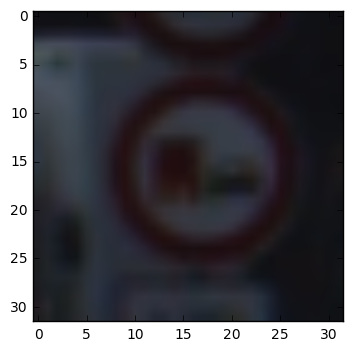

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

dispIndex = random.randint(0,len(X_train))
img = X_train[dispIndex]
print(y_train[dispIndex])
plt.imshow(img)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
#preprocessing helper functions
import numpy as np


def regularize(x):
    outMin = -.9
    outMax = .9
    xMin = np.amin(x)
    xMax = np.amax(x)
    return outMin + (x-xMin)*(outMax-outMin)/(xMax-xMin) 



In [5]:
#only run this to duplicate the data with rotations added

from skimage.transform import rotate
import random

def spinImg(X,y):
    minAngle = -15
    maxAngle = 15
    ang = random.uniform(minAngle,maxAngle)
    outx = rotate(X,ang)
    return outx, y

def addSpunImages(X,y,count=1000):
    newX = np.copy(X[0:1])
    newY = np.copy(y[0:1])

    for ind in range(count):
        i = random.randint(0,len(X))
        X_new, y_new = spinImg(X[i],y[i])
        newX = np.append(newX,X_new)
        newY = np.append(newY,y_new)

    newX = np.reshape(newX,[-1,32,32,3])
    X = np.append(X,newX)
    y = np.append(y,newY)
    X=np.reshape(X,[-1,32,32,3])
    return X,y

1


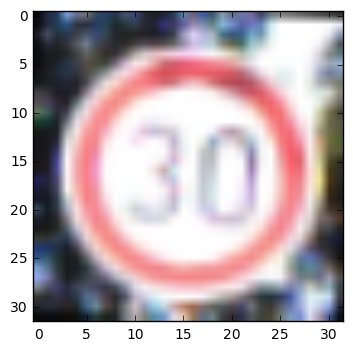

In [6]:
show = random.randint(0,len(X_train))
im,tag = spinImg(X_train[show],y_train[show])
assert(tag==y_train[show])
print(tag)
plt.imshow(im)

In [7]:
print('Starting size: ' + str(len(X_train)))
X_train, y_train = addSpunImages(X_train,y_train,6000)
print('New size: ' + str(np.shape(X_train)))

Starting size: 29406
New size: (35407, 32, 32, 3)


In [8]:
##preprocess
from sklearn.utils import shuffle


X_train = regularize(X_train)
X_validation = regularize(X_validation)
X_test = regularize(X_test)



X_train, y_train = shuffle(X_train, y_train)

In [9]:
##define LeNet-5 
from tensorflow.contrib.layers import flatten
import tensorflow as tf
# Hyperparameters
mu = 0
sigma = 0.1
layer_depth = {
    'layer_1':24,
    'layer_2':48,
    'layer_3':120,
    'layer_4':84,
    'outputs':43,
}

weights = { 
    'layer_1': tf.Variable(tf.truncated_normal([5, 5, 3, layer_depth['layer_1']],mean = mu, stddev = sigma)),
    'layer_2': tf.Variable(tf.truncated_normal([5, 5, layer_depth['layer_1'], layer_depth['layer_2']],mean = mu, stddev = sigma)),
    'layer_3': tf.Variable(tf.truncated_normal([5*5*layer_depth['layer_2'], layer_depth['layer_3']],mean = mu, stddev = sigma)),
    'layer_4': tf.Variable(tf.truncated_normal([layer_depth['layer_3'], layer_depth['layer_4']],mean = mu, stddev = sigma)),
    'layer_5': tf.Variable(tf.truncated_normal([layer_depth['layer_4'], layer_depth['outputs']],mean = mu, stddev = sigma))
}
bias = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_depth['layer_3'])),
    'layer_4': tf.Variable(tf.zeros(layer_depth['layer_4'])),
    'layer_5': tf.Variable(tf.zeros(layer_depth['outputs'])),
}

def LeNet(x, keep_ratio=.5):    

    global layer_depth,weights,bias
    #dropout is on layer 3
    keep_prob= keep_ratio

    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    l1 = tf.nn.bias_add(tf.nn.conv2d(x,weights['layer_1'],strides=[1,1,1,1],padding='VALID'),bias['layer_1']) 
    # TODO: Activation.
    l1 = tf.nn.relu(l1)
    #dropout
    l1 = tf.nn.dropout(l1,(.8+.2*keep_prob))
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    l1 = tf.nn.max_pool(l1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    l2 = tf.nn.bias_add(tf.nn.conv2d(l1,weights['layer_2'],strides=[1,1,1,1],padding='VALID'),bias['layer_2'])
    #dropout
    l2 = tf.nn.dropout(l2,(.5+.5*keep_prob))
    # Activation.
    l2 = tf.nn.relu(l2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    l2 = tf.nn.max_pool(l2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    # Flatten. Input = 5x5x16. Output = 400.
    l2 = flatten(l2)
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    l3 = tf.add(tf.matmul(l2,weights['layer_3']),bias['layer_3'])
    #drop out on fully connected layer 1
    l3 = tf.nn.dropout(l3,keep_prob)
    # Activation.
    l3 = tf.nn.relu(l3)
    #Layer 4: Fully Connected. Input = 120. Output = 84.
    l4 = tf.add(tf.matmul(l3,weights['layer_4']),bias['layer_4'])
    #l4 dropout
    l4 = tf.nn.dropout(l4,keep_prob)
    #  Activation.
    l4 = tf.nn.relu(l4)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(l4,weights['layer_5']),bias['layer_5'])
    
    return logits

In [22]:
##setup training pipeline


EPOCHS = 20
BATCH_SIZE = 90
rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


logits = LeNet(x)
testLogits = LeNet(x,1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [23]:
#setup evaluation
correct_prediction = tf.equal(tf.argmax(testLogits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [24]:
##run Training

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenetTrafficSign')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.598

EPOCH 2 ...
Validation Accuracy = 0.836

EPOCH 3 ...
Validation Accuracy = 0.914

EPOCH 4 ...
Validation Accuracy = 0.943

EPOCH 5 ...
Validation Accuracy = 0.956

EPOCH 6 ...
Validation Accuracy = 0.962

EPOCH 7 ...
Validation Accuracy = 0.969

EPOCH 8 ...
Validation Accuracy = 0.974

EPOCH 9 ...
Validation Accuracy = 0.982

EPOCH 10 ...
Validation Accuracy = 0.982

EPOCH 11 ...
Validation Accuracy = 0.982

EPOCH 12 ...
Validation Accuracy = 0.983

EPOCH 13 ...
Validation Accuracy = 0.987

EPOCH 14 ...
Validation Accuracy = 0.988

EPOCH 15 ...
Validation Accuracy = 0.988

EPOCH 16 ...
Validation Accuracy = 0.986

EPOCH 17 ...
Validation Accuracy = 0.989

EPOCH 18 ...
Validation Accuracy = 0.989

EPOCH 19 ...
Validation Accuracy = 0.989

EPOCH 20 ...
Validation Accuracy = 0.991

Model saved


In [25]:
#DO NOT RUN UNTIL DONE
#test 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.950


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**


I scaled the data using the regularization equation from lecture.  I scaled the output to +/-.9 as a way to get 0 mean data for the network to consume.  I used the min and max of each image to maximize contrast, instead of the 0 to 255 for the normal range.  My hope was that the very dark, or very light images would be remapped to create more definition of features.

I chose this based on the lecture that suggested scaling from .1 to .9, as well as other information suggesting to have 0 mean data.  By combining these two points, I scaled from -.9 to +.9.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I created validation data from the training set.  I used the default 25% split, since there seems to be plenty of examples of each label type.  The training, validation and test data were sent through the same preprocessing.  It seems obvious that the network would only work on a test set with the same type of input, so both the training and test data were preprocessed.

I generated data to add to the set.  I did this by rotating the images by a random +/- angle for each image.  I randomly selected each image, so it should be, proportionally, a similar distribution to the original data set.  I added 6000 rotated images based on a somewhat arbitrary number of roughly 20% of the training set.  The randomized images were only added to the training set, and not the validation set.  



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is the LeNet-5.  It's 2 - 5x5 convolutional layers and 3 fully connected layers.  The main modification I made from the LeNet lab and this one is the addition of preprocessing to images, creating more samples, and 50% drop out on the first fully connected layer during training.  

I also increased the depth of L1 and L2.  I increased the L1 and L2 depths based on going from 1 color to 3 colors.  A common network, like AlexNet, has 96 filters on the first layer, so I took guidance from that and made the layers deeper, rather than add more layers.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


I used an Adam Optimizer.  I used a batch size of 90.  I ran 20 epochs.  I had a learning rate of .001.  I used dropout on all the layers. 

I chose 20 epochs because it seemed to still be making decent improvements at 10 epochs.  I think the reality is that this only needs to run to 15 or 17, but by 20, it seems to be pretty close to a final value.  I tried batches of 64, 128 and 512 as well.  The 64 and 128 batches were pretty similar, the 512 did about 1% worse than either.  I picked 90 to split the difference between 64 and 128.  I think there's a general statistical variance in the training process, so it's hard to say if one is better than the other; they both validate to around 99% and do about 94-96% on the test set.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

I used the LeNet-5 for this.  It was discussed in class and did, in fact, work pretty well on this solution.  The biggest reason is that a lot was setup in advance.  If I have time, I want to try the inception module architecture.

I started by implementing the vanilla network from the lab.  This involved adding depth to the first layer from 1 to 3 and making a few other small dimensional updates.  Out of the box, it worked pretty well, but I wanted to try some of the techniques described in the lecture.

The first thing I added was preprocessing for data value scaling.  At first, I did a x-128/255, but it actually made my final epoch validation worse by a few %.  I went back and implemented the scaling as .1 to .9 as described in one of the quizes.  That worked as well as unscaled.  I then scaled from -.9 to +.9.

The optional assignment described creating more data, so I did that.  I wasn't particularly creative with it, but I just added random rotations.  This did curb some overfitting and improved results a little bit.

Lastly, I focused on a strategy of adding more depth to the convolutional layers, adding dropout to all the layers, and allow for a longer training time.  Successful networks have very deep convolution layers (like 96 on L1 of AlexNet).  Based on going from the black/white MNIST set to these color images, I started at 3 times the L1 filters, just based on going from black and white to color.  As the size of the network increases, dropout has more benefits.  Since dropout allows the network to explore the weight space further, it also made sense to run for more epochs to allow it to dropout and break through local minimas.  

The last time I ran the network, it trained up to 99.1% test accuracy over 20 epochs.  Running on the test data set, it gave an accuracy of 95.8%, which showed it was overfit by 3.3%.  For a project, I'm happy with it.



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(5, 32, 32, 3)


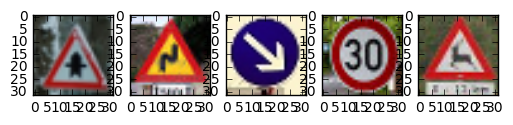

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimage

photo1 = mpimage.imread('./internetData/1.jpg')
photo2 = mpimage.imread('./internetData/6.jpg')
photo3 = mpimage.imread('./internetData/3.jpg')
photo4 = mpimage.imread('./internetData/4.jpg')
photo5 = mpimage.imread('./internetData/7.jpg')

photos = np.array([photo1,photo2,photo3,photo4,photo5])
print(np.shape(photos))
plt.figure(1)
plt.subplot(151)
plt.imshow(photo1)
plt.subplot(152)
plt.imshow(photo2)
plt.subplot(153)
plt.imshow(photo3)
plt.subplot(154)
plt.imshow(photo4)
plt.subplot(155)
plt.imshow(photo5)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I edited these in GIMP based on images I found on the internet of German traffic signs.  The first image is harder because there's a little snow on it, but otherwise, I think they are nice clean examples that should be easy to guess.

In [27]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
photos = regularize(photos)
with tf.Session() as sess:
    saver.restore(sess, './lenetTrafficSign')
    outLogits = sess.run(testLogits, feed_dict={x:photos})
    


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

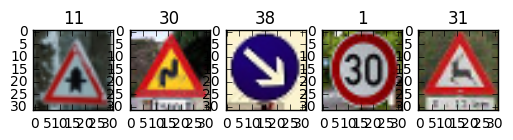

In [28]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

plt.figure(2)
plt.subplot(151)
plt.imshow(photo1)
plt.title(np.argmax(outLogits[0]))
plt.subplot(152)
plt.imshow(photo2)
plt.title(np.argmax(outLogits[1]))
plt.subplot(153)
plt.imshow(photo3)
plt.title(np.argmax(outLogits[2]))
plt.subplot(154)
plt.imshow(photo4)
plt.title(np.argmax(outLogits[3]))
plt.subplot(155)
plt.imshow(photo5)
plt.title(np.argmax(outLogits[4]))

The accuracy was 80%.  The trained accuracy was 95%.  Clearly, it is still prone to making errors.  The test accuracy is much higher, and it's probably the more accurate number since it's based on thousands of samples.  A possible reason for this is lower representation of this sign in the training set, or this sign is somewhat different than normal signs of this type.  I would need to do additional analysis to prove why it had a hard time with such a clear image.

Correct: 
Photo1 - Right-of-way
Photo3 - Keep Right
Photo4 - 30km/h Speed Limit
Photo5 - Wild animal crossing

Wrong:
Photo2 - Guessed: Beware of ice/snow, Actual: double curve (21)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [29]:
with tf.Session() as sess:
    smLogits = sess.run(tf.nn.softmax(outLogits))
    print(sess.run(tf.nn.top_k(smLogits, k=3)))

TopKV2(values=array([[  9.99998212e-01,   1.82369263e-06,   5.29472022e-11],
       [  4.06125486e-01,   2.99156874e-01,   1.24540597e-01],
       [  1.00000000e+00,   8.48150196e-27,   2.53522305e-32],
       [  1.00000000e+00,   2.88491814e-10,   4.22277630e-11],
       [  8.05865765e-01,   8.77069160e-02,   2.80363895e-02]], dtype=float32), indices=array([[11, 30, 27],
       [30,  3, 28],
       [38, 34, 36],
       [ 1,  0,  2],
       [31, 21, 24]], dtype=int32))


Photo 1 - The network was extremely confident with its choice (which was correct).  The second choice was 2e-6. 
Photo 2 - It was at .41 and .30 and .13 %.  The network was not sure about this choice, and it got it wrong.  Unfortunately, the correct choice (21) didn't show up in the top 3.  It thought it could be snow, 60km/hr speed limit or children crossing.
Photo 3 - Extremely confident.  The network beleives there's a 100% chance this is the keep right sign, and it's correct. 
Photo 4 - Extremely confident.  100% belief that it's 30 km/hr, which is correct.
Photo 5 - Highly confident.  It thought 81% chance this was a animal crossing sign, and it was correct.  It felt there was a 9% chance it was the double curve sign.
